<a href="https://colab.research.google.com/github/amar-naik/EVA/blob/master/S9/Q9/EVA4_Q9_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [1]:
import datetime 
print("Current Date/Time: ", datetime.datetime.now())

Current Date/Time:  2020-03-17 20:32:25.431458


In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
# from torch_receptive_field import PytorchReceptiveField

!pip install torchsummary

# from receptivefield.image import get_default_image
# from torch_receptive_field import receptive_field

# 2. Mount Google Drive to get the files individual files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Q9_CIFAR10_quiz/")
!ls

customDeepCNN.py  dataTorchTransformLoad.py  __pycache__  testModel.py
data		  EVA4_Q9_CIFAR10.ipynb      QuizDNN.py   trainModel.py


In [5]:
!rm -rf '/content/drive/My Drive/Colab Notebooks/Q9_CIFAR10_quiz/__pycache__'
!ls -lrt '/content/drive/My Drive/Colab Notebooks/Q9_CIFAR10_quiz/'

total 693
-rw------- 1 root root   4013 Mar 17 19:29 customDeepCNN.py
-rw------- 1 root root   3807 Mar 17 19:29 trainModel.py
-rw------- 1 root root   2488 Mar 17 19:29 testModel.py
-rw------- 1 root root   4771 Mar 17 19:29 dataTorchTransformLoad.py
drwx------ 3 root root   4096 Mar 17 19:33 data
-rw------- 1 root root   2662 Mar 17 20:18 QuizDNN.py
-rw------- 1 root root 686069 Mar 17 20:31 EVA4_Q9_CIFAR10.ipynb


## 2.1 Add Googledrive path to the systempath  

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Q9_CIFAR10_quiz/')
#sys.path.append('/content/drive/My Drive/')


# 3. Import custom functions and classes

 1. dataTorchTransformLoad
 2. customDeepCNN
 3. trainModel (params for regularization and misclassification plots)
 4. testModel (params for regularization and misclassification plots)


In [0]:
import dataTorchTransformLoad as dtl
import customDeepCNN as deep_cnn
import trainModel
import testModel
#import resnet as resnet

In [0]:
# !cat '/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py'

In [9]:
from QuizDNN import QuizDNN
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,928
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1

# 4. Train - Test Data Load with torch transforms

In [11]:
train,test,train_loader,test_loader = dtl.data_transform_and_load_function('CIFAR10',128)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


## 4.1 Data Statistics

In [12]:
train_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
    #print(vars(train_set))
print("Shape : ", train_set.data.shape)
print("Mean : ",train_set.data.mean(axis=(0,1,2))/255)
print("Std : ",train_set.data.std(axis=(0,1,2))/255)
print("Min : ",train_set.data.min(axis=(0,1,2))/255)
print("Max : ",train_set.data.max(axis=(0,1,2))/255)

Files already downloaded and verified
Shape :  (50000, 32, 32, 3)
Mean :  [0.49139968 0.48215841 0.44653091]
Std :  [0.24703223 0.24348513 0.26158784]
Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


## 4.2 Display data

[['plane' 'dog' 'deer' 'deer' 'truck' 'cat' 'truck' 'truck']
 ['cat' 'cat' 'plane' 'horse' 'plane' 'dog' 'dog' 'deer']
 ['car' 'car' 'frog' 'car' 'frog' 'dog' 'ship' 'cat']
 ['car' 'frog' 'deer' 'bird' 'deer' 'bird' 'cat' 'horse']
 ['car' 'cat' 'cat' 'ship' 'horse' 'plane' 'plane' 'plane']
 ['truck' 'plane' 'frog' 'horse' 'ship' 'deer' 'bird' 'plane']
 ['cat' 'dog' 'bird' 'truck' 'dog' 'cat' 'deer' 'dog']
 ['dog' 'frog' 'horse' 'frog' 'ship' 'deer' 'plane' 'truck']]


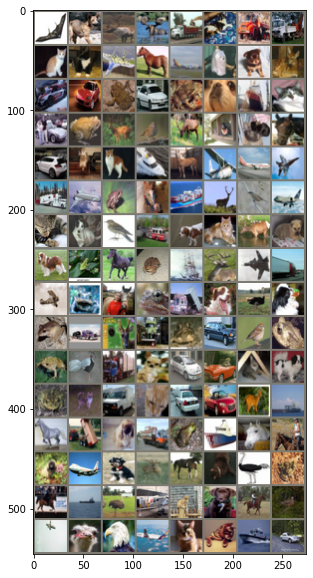

In [13]:
# functions to show an image
def imageshow(img):
    # img = img / 2 + 0.5      #unnormalize
    img[0] = img[0]*0.24703223 + 0.49139968
    img[1] = img[1]*0.24348513 + 0.48215841
    img[2] = img[2]*0.26158784 + 0.44653091
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

random.seed(1)
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
random.seed(1)
imageshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(64)))
print(np.array([classes[labels[j]] for j in range(64)]).reshape(8,8))

# 6. Run Models

## 6.1 Normal Run - No Regularization

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
#model = deep_cnn.Net(no_input_channels = 3).to(device)
#model = deep_cnn.ResNet18().to(device)
#model = resnet.ResNet18().to(device)
model = QuizDNN().to(device)
#optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9,weight_decay = 5e-4)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses = []
train_acc = []
test_losses = []
test_acc = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'Normal', True, EPOCHS-1)
    train_losses.append(tr_losses)
    train_acc.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'Normal',True, EPOCHS-1)
    test_losses.append(ts_loss)
    test_acc.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=-0.014492125250399113 Batch_id=0 Accuracy=10.16:   0%|          | 0/391 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/Q9_CIFAR10_quiz/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=-12.567436218261719 Batch_id=390 Accuracy=26.27: 100%|██████████| 391/391 [00:26<00:00, 15.64it/s]
/content/drive/My Drive/Colab Notebooks/Q9_CIFAR10_quiz/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
  0%|     


Test set: Average loss: -14.2693, Accuracy: 2112/10000 (21.12%)

EPOCH: 1


Loss=-90.4000244140625 Batch_id=390 Accuracy=20.71: 100%|██████████| 391/391 [00:26<00:00, 15.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -92.4812, Accuracy: 1857/10000 (18.57%)

EPOCH: 2


Loss=-812.67724609375 Batch_id=390 Accuracy=19.47: 100%|██████████| 391/391 [00:26<00:00, 15.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -799.1761, Accuracy: 1941/10000 (19.41%)

EPOCH: 3


Loss=-6005.13916015625 Batch_id=390 Accuracy=19.23: 100%|██████████| 391/391 [00:26<00:00, 15.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6707.7460, Accuracy: 1920/10000 (19.20%)

EPOCH: 4


Loss=-46818.4609375 Batch_id=390 Accuracy=19.63: 100%|██████████| 391/391 [00:26<00:00, 15.93it/s]
